# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

     |████████████████████████████████| 13.1MB 310kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Import Statements

In [141]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [3]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
print(f"df_hh_income dataframe shape: {df_hh_income.shape} ({df_hh_income.shape[1]} columns and {df_hh_income.shape[0]} rows).")
print(f"df_hh_income dataframee columns names: {df_hh_income.columns.tolist()}.")
df_hh_income.sample(5)

df_hh_income dataframe shape: (29322, 3) (3 columns and 29322 rows).
df_hh_income dataframee columns names: ['Geographic Area', 'City', 'Median Income'].


Geographic Area              City Median Income
14544              MO  Stotts City city           (X)
18060              NC          Avon CDP         56406
23307              SC    Abbeville city         20440
12877              MN      McGrath city           (X)
21110              OK     White Oak CDP         42917

In [5]:
print(f"df_pct_poverty dataframe shape: {df_pct_poverty.shape} ({df_pct_poverty.shape[1]} columns and {df_pct_poverty.shape[0]} rows).")
print(f"df_pct_poverty dataframee columns names: {df_pct_poverty.columns.tolist()}.")
df_pct_poverty.sample(5)

df_pct_poverty dataframe shape: (29329, 3) (3 columns and 29329 rows).
df_pct_poverty dataframee columns names: ['Geographic Area', 'City', 'poverty_rate'].


Geographic Area                  City poverty_rate
12865              MN     Little Falls city         15.3
19229              OH         Ballville CDP          6.2
11450              MA      Agawam Town city          8.5
12156              MI  North Branch village           17
17988              NY    West Hempstead CDP          5.9

In [6]:
print(f"df_pct_completed_hs dataframe shape: {df_pct_completed_hs.shape} ({df_pct_completed_hs.shape[1]} columns and {df_pct_completed_hs.shape[0]} rows).")
print(f"df_pct_completed_hs dataframee columns names: {df_pct_completed_hs.columns.tolist()}.")
df_pct_completed_hs.sample(5)

df_pct_completed_hs dataframe shape: (29329, 3) (3 columns and 29329 rows).
df_pct_completed_hs dataframee columns names: ['Geographic Area', 'City', 'percent_completed_hs'].


Geographic Area                 City percent_completed_hs
22124              PA  Greencastle borough                 88.7
21716              PA        Byrnedale CDP                   94
5174               GA         Cochran city                 75.1
382                AL       New Market CDP                 86.9
27771              WA        Puyallup city                 92.2

In [7]:
print(f"df_share_race_city dataframe shape: {df_share_race_city.shape} ({df_share_race_city.shape[1]} columns and {df_share_race_city.shape[0]} rows).")
print(f"df_share_race_city dataframee columns names: {df_share_race_city.columns.tolist()}.")
df_share_race_city.sample(5)

df_share_race_city dataframe shape: (29268, 7) (7 columns and 29268 rows).
df_share_race_city dataframee columns names: ['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'].


Geographic area                 City share_white share_black  \
2895               CA         Oakland city        34.5          28   
24667              TX            Buda city        84.5         2.9   
7190               IL       Sidell village        97.9         0.2   
20191              OH  Summerfield village        98.4           0   
27719              WA           Queets CDP         2.9         0.6   

      share_native_american share_asian share_hispanic  
2895                    0.8        16.8           25.4  
24667                   0.4         1.2           35.4  
7190                    0.3           0            0.6  
20191                     0         0.4            1.2  
27719                  91.4           0              0

In [8]:
print(f"df_fatalities dataframe shape: {df_fatalities.shape} ({df_fatalities.shape[1]} columns and {df_fatalities.shape[0]} rows).")
print(f"df_fatalities dataframee columns names: {df_fatalities.columns.tolist()}.")
df_fatalities.sample(5)

df_fatalities dataframe shape: (2535, 14) (14 columns and 2535 rows).
df_fatalities dataframee columns names: ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera'].


id                 name      date manner_of_death    armed   age  \
2467  2744      Jesus Cervantes  06/07/17            shot  vehicle 35.00   
2294  2554          Malik Carey  03/05/17            shot      gun 18.00   
1310  1493  Darrel S. Machemehl  26/04/16            shot      gun 44.00   
1494  1684        Shannon Labit  03/07/16            shot    knife 40.00   
1276  1457        Joshua Moreno  12/04/16            shot      gun 38.00   

     gender race          city state  signs_of_mental_illness threat_level  \
2467      M  NaN    Plant City    FL                    False        other   
2294      M    B  Grand Rapids    MI                    False       attack   
1310      M    W     Kingsbury    TX                    False        other   
1494      M    W    New Iberia    LA                     True        other   
1276      M    H        Benton    IL                    False       attack   

             flee  body_camera  
2467          Car        False  
2294  Not fleeing         True  
1310        Other        False  
1494  Not fleeing        False  
1276          Car        False

In [9]:
print(f'df_hh_income: number of missing values across columns: \n{df_hh_income.isna().sum()}')
print(f'df_pct_poverty: number of missing values across columns: \n{df_pct_poverty.isna().sum()}')
print(f'df_pct_completed_hs: number of missing values across columns: \n{df_pct_completed_hs.isna().sum()}')
print(f'df_share_race_city: number of missing values across columns: \n{df_share_race_city.isna().sum()}')
print(f'df_fatalities: number of missing values across columns: \n{df_fatalities.isna().sum()}')

df_hh_income: number of missing values across columns: 
Geographic Area     0
City                0
Median Income      51
dtype: int64
df_pct_poverty: number of missing values across columns: 
Geographic Area    0
City               0
poverty_rate       0
dtype: int64
df_pct_completed_hs: number of missing values across columns: 
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
df_share_race_city: number of missing values across columns: 
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64
df_fatalities: number of missing values across columns: 
id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city    

In [10]:
print(f'df_hh_income: number of rows with duplicated data: {df_hh_income.duplicated().sum()}')
print(f'df_pct_poverty: number of rows with duplicated data: {df_pct_poverty.duplicated().sum()}')
print(f'df_pct_completed_hs: number of rows with duplicated data: {df_pct_completed_hs.duplicated().sum()}')
print(f'df_share_race_city: number of rows with duplicated data: {df_share_race_city.duplicated().sum()}')
print(f'df_fatalities: number of rows with duplicated data: {df_fatalities.duplicated().sum()}')

df_hh_income: number of rows with duplicated data: 0
df_pct_poverty: number of rows with duplicated data: 0
df_pct_completed_hs: number of rows with duplicated data: 0
df_share_race_city: number of rows with duplicated data: 0
df_fatalities: number of rows with duplicated data: 0


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [11]:
print(f"NaN values in df_hh_income will be filled with 0.")
df_hh_income = df_hh_income.fillna(0)

NaN values in df_hh_income will be filled with 0.


In [12]:
rows_with_nan = df_fatalities.isnull().any(axis=1)
percentage = (rows_with_nan.sum() / len(df_fatalities)) * 100
print(f"Percentage of rows with NaN values in df_fatalities: {percentage:.2f}%")
print(f"Due to low percentage of rows with NaN values in df_fatalities those rows will be excluded from further consideration.")
df_fatalities.dropna(inplace=True)

Percentage of rows with NaN values in df_fatalities: 11.08%
Due to low percentage of rows with NaN values in df_fatalities those rows will be excluded from further consideration.


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [13]:
df_pct_poverty['poverty_rate'].replace('-', np.nan, regex=True, inplace=True)
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].astype(float)
states_poverty_rate_states = df_pct_poverty.groupby('Geographic Area').agg({'poverty_rate': pd.Series.mean})

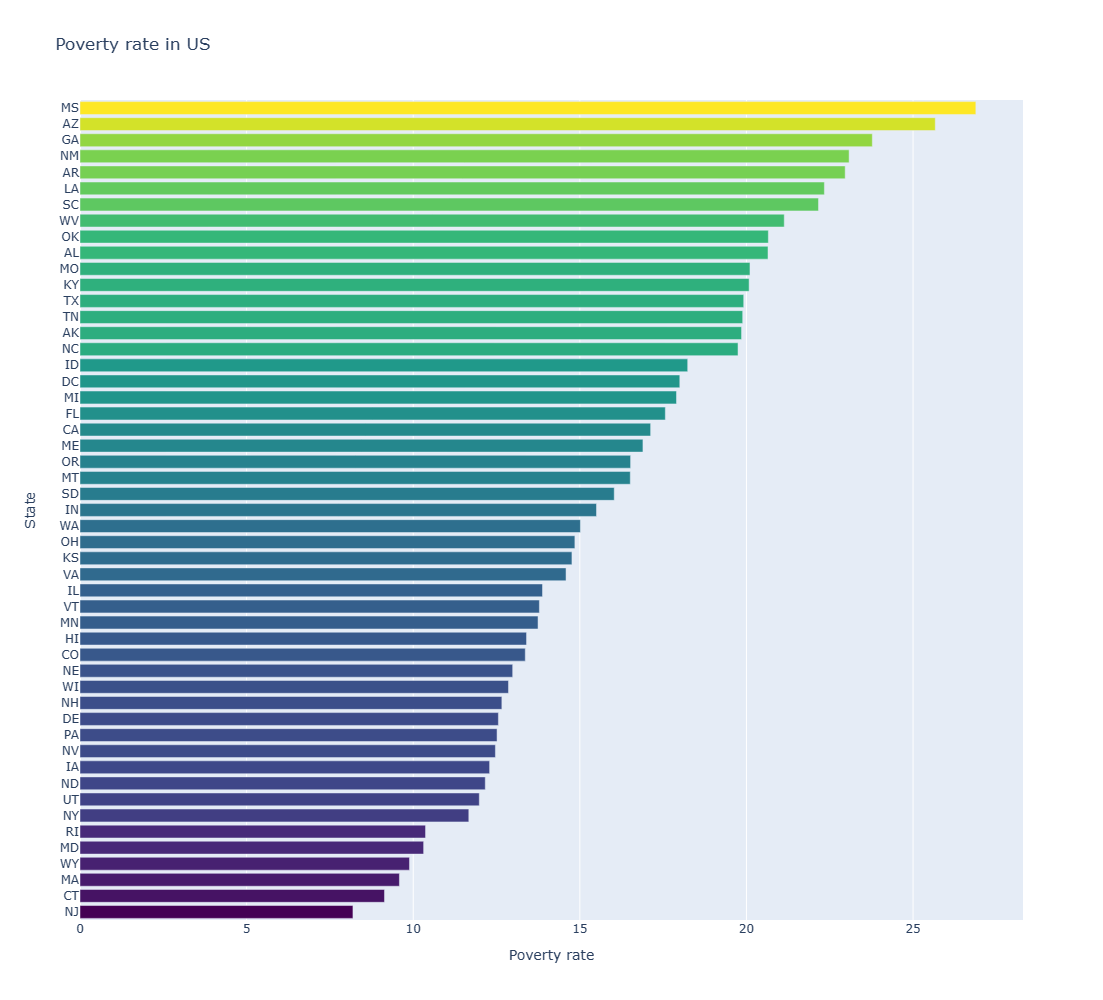

In [14]:
states_poverty_rate_states.sort_values(by='poverty_rate', inplace=True)
h_bar_org = px.bar(
    states_poverty_rate_states, 
    x=states_poverty_rate_states['poverty_rate'], 
    y=states_poverty_rate_states.index, 
    orientation='h', 
    height=1000,
    color=states_poverty_rate_states['poverty_rate'],
    color_continuous_scale='Viridis',
    title='Poverty rate in US')

h_bar_org.update_layout(xaxis_title='Poverty rate', 
                    yaxis_title='State',
                    coloraxis_showscale=False)

h_bar_org.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

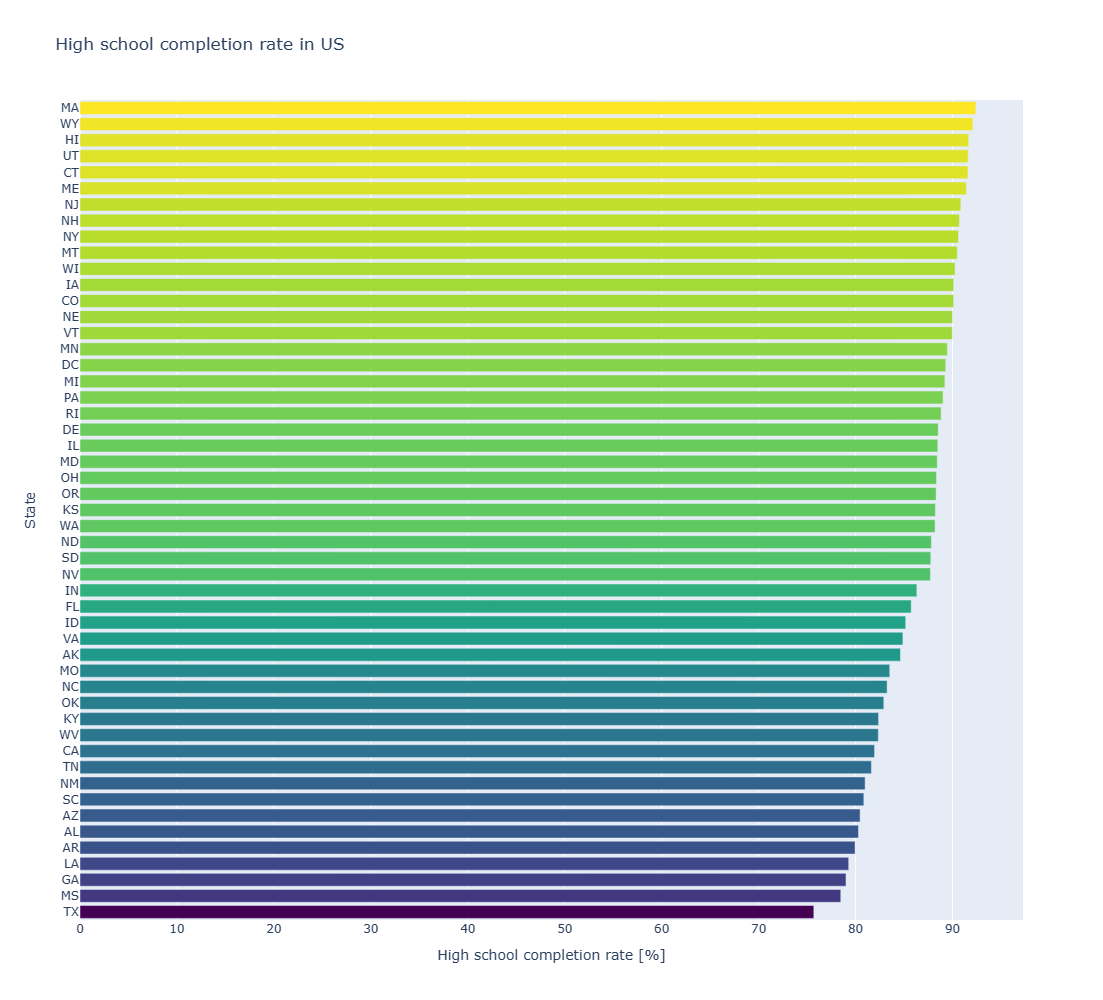

In [15]:
df_pct_completed_hs['percent_completed_hs'].replace('-', np.nan, regex=True, inplace=True)
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].astype(float)
states_hs_commpletion_rate = df_pct_completed_hs.groupby('Geographic Area').agg({'percent_completed_hs': pd.Series.mean})

states_hs_commpletion_rate.sort_values(by='percent_completed_hs', inplace=True)
h_bar_org = px.bar(
    states_hs_commpletion_rate, 
    x=states_hs_commpletion_rate['percent_completed_hs'], 
    y=states_hs_commpletion_rate.index, 
    orientation='h', 
    height=1000,
    color=states_hs_commpletion_rate['percent_completed_hs'],
    color_continuous_scale='Viridis',
    title='High school completion rate in US')

h_bar_org.update_layout(xaxis_title='High school completion rate [%]', 
                    yaxis_title='State',
                    coloraxis_showscale=False)

h_bar_org.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [16]:
states_poverty_v_hs_compl = pd.concat([states_hs_commpletion_rate, states_poverty_rate_states], axis=1)
states_poverty_v_hs_compl

percent_completed_hs  poverty_rate
Geographic Area                                    
TX                              75.69         19.92
MS                              78.47         26.88
GA                              79.01         23.78
LA                              79.29         22.34
AR                              79.95         22.96
AL                              80.30         20.65
AZ                              80.47         25.67
SC                              80.85         22.16
NM                              80.98         23.08
TN                              81.63         19.89
CA                              81.96         17.12
WV                              82.35         21.13
KY                              82.37         20.08
OK                              82.91         20.66
NC                              83.25         19.75
MO                              83.52         20.11
AK                              84.63         19.85
VA                              84.88         14.59
ID                              85.17         18.24
FL                              85.74         17.57
IN                              86.32         15.50
NV                              87.72         12.47
SD                              87.75         16.03
ND                              87.82         12.16
WA                              88.20         15.02
KS                              88.23         14.76
OR                              88.30         16.52
OH                              88.34         14.85
MD                              88.42         10.31
IL                              88.48         13.88
DE                              88.52         12.56
RI                              88.82         10.37
PA                              89.02         12.52
MI                              89.21         17.90
DC                              89.30         18.00
MN                              89.47         13.75
VT                              89.98         13.79
NE                              89.99         12.98
CO                              90.11         13.36
IA                              90.11         12.29
WI                              90.26         12.86
MT                              90.49         16.51
NY                              90.61         11.67
NH                              90.71         12.66
NJ                              90.85          8.19
ME                              91.43         16.89
CT                              91.59          9.14
UT                              91.62         11.98
HI                              91.67         13.40
WY                              92.10          9.89
MA                              92.40          9.59

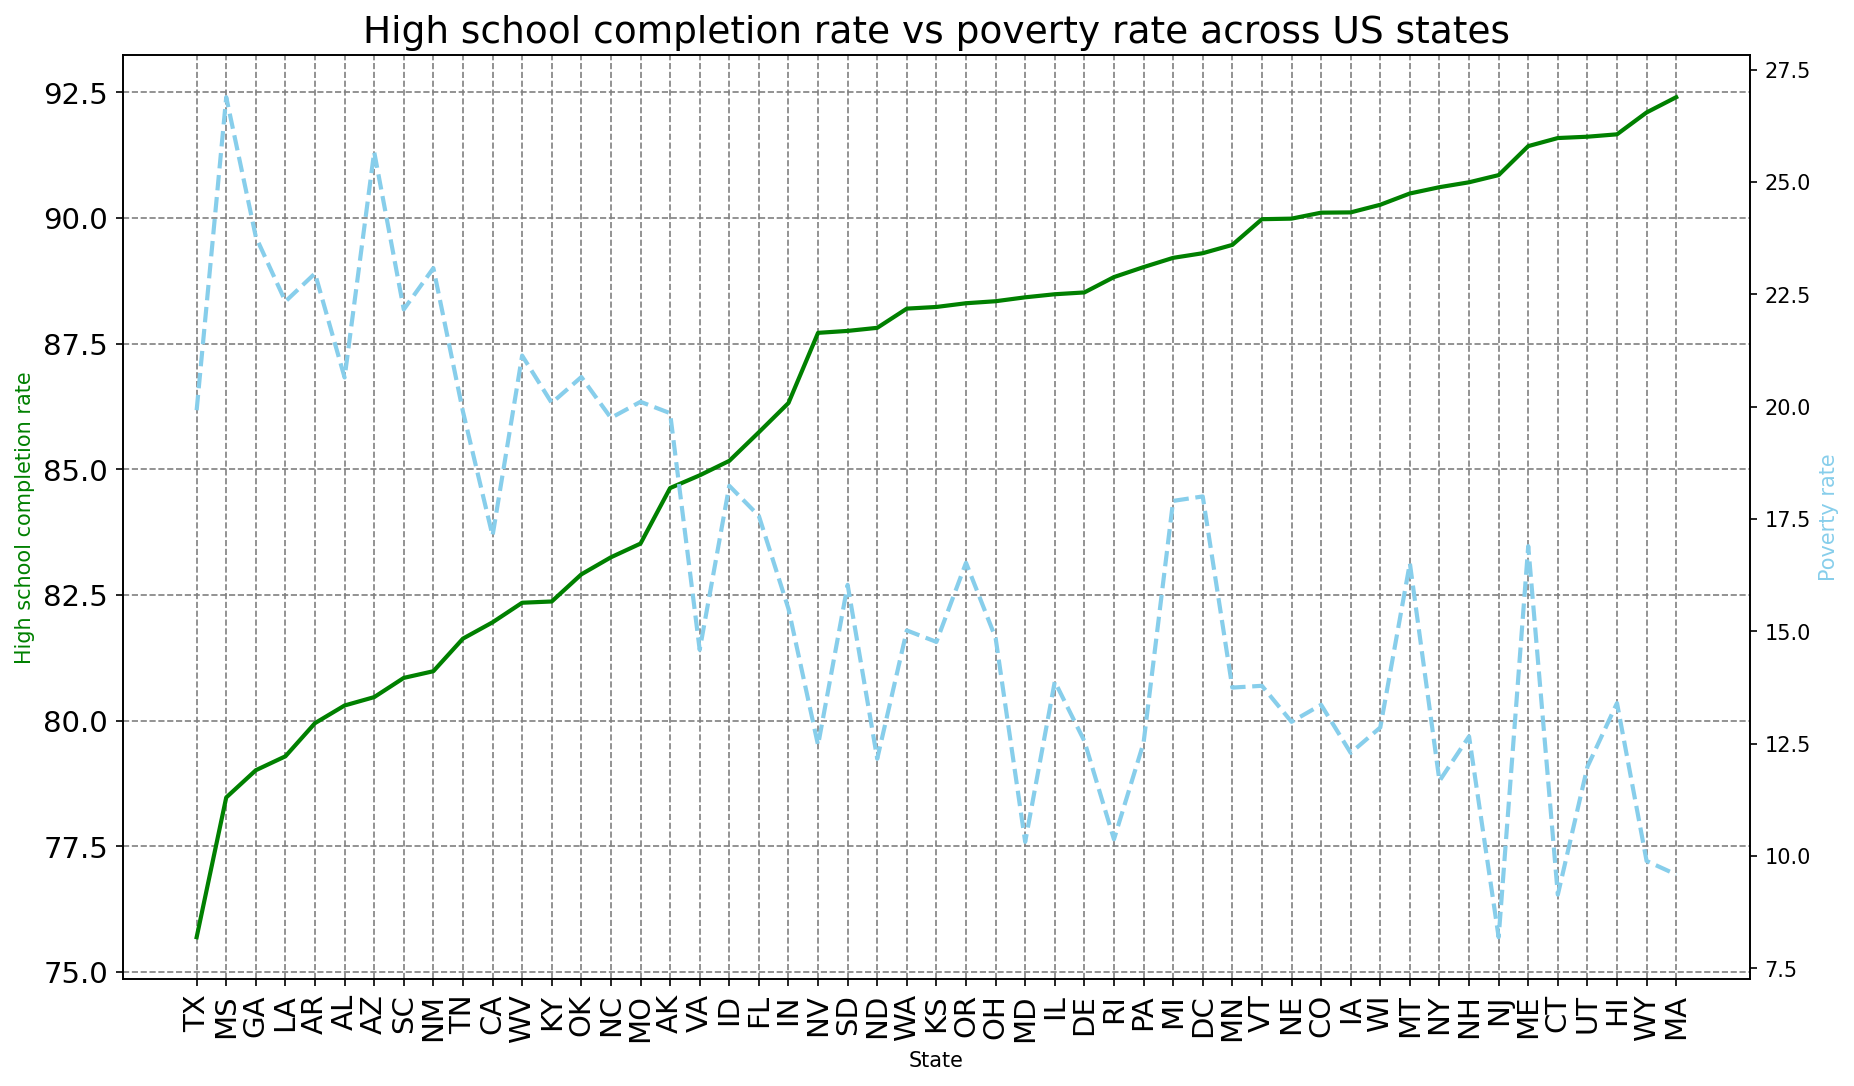

In [17]:
plt.figure(figsize=(14,8), dpi=150)
plt.title('High school completion rate vs poverty rate across US states', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx() 

ax1.plot(states_poverty_v_hs_compl.index, states_poverty_v_hs_compl.percent_completed_hs, color='green', linestyle='-', linewidth=2)
ax2.plot(states_poverty_v_hs_compl.index,states_poverty_v_hs_compl.poverty_rate, color='skyblue', linestyle='--', linewidth=2)

ax1.set_xlabel('State')
ax1.set_ylabel('High school completion rate', color='green')
ax2.set_ylabel('Poverty rate', color='skyblue')

ax1.grid(color='grey', linestyle='--')

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

C:\Users\james\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\james\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\james\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\james\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



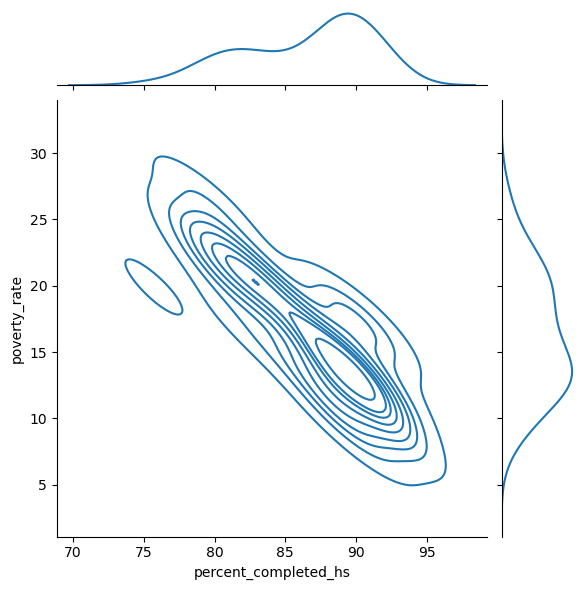

In [18]:
sns.jointplot(data=states_poverty_v_hs_compl, x="percent_completed_hs", y="poverty_rate", kind="kde")

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

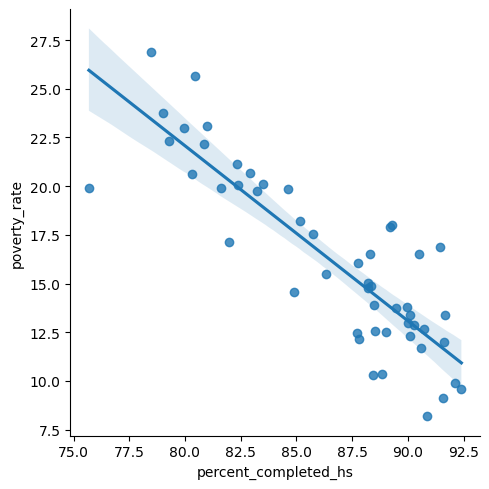

In [19]:
sns.lmplot(data=states_poverty_v_hs_compl, x="percent_completed_hs", y="poverty_rate")

<Axes: xlabel='percent_completed_hs', ylabel='poverty_rate'>

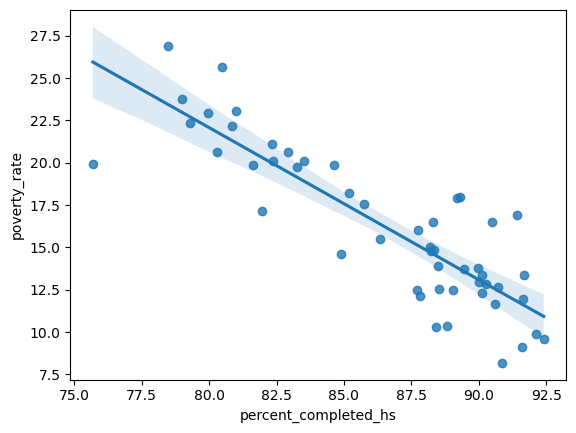

In [20]:
sns.regplot(data=states_poverty_v_hs_compl, x="percent_completed_hs", y="poverty_rate")

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [21]:
df_share_race_city.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [22]:
df_share_race_city
df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].apply(pd.to_numeric, errors='coerce')

states_race_share = df_share_race_city.groupby('Geographic area').agg({'share_white': pd.Series.mean, 'share_black': pd.Series.mean, 'share_native_american': pd.Series.mean, 'share_asian': pd.Series.mean, 'share_hispanic': pd.Series.mean})

# Divide 100 by the sum of columns for each row
row_sums = states_race_share.sum(axis=1)
row_sums
ratios = 100 / row_sums
ratios

# Multiply each column value by the corresponding ratio to get normalized data
normalized_states_race_share = states_race_share.mul(ratios, axis=0)
normalized_states_race_share


share_white  share_black  share_native_american  share_asian  \
Geographic area                                                                 
AK                     47.74         0.59                  47.97         1.45   
AL                     72.54        23.33                   0.66         0.48   
AR                     78.25        16.26                   0.76         0.48   
AZ                     54.31         0.87                  25.91         0.66   
CA                     64.45         2.41                   1.55         4.99   
CO                     80.25         0.84                   1.49         1.06   
CT                     83.83         4.86                   0.64         2.91   
DC                     37.71        49.66                   0.29         3.43   
DE                     75.06        15.15                   0.52         1.97   
FL                     71.10        12.08                   0.41         1.46   
GA                     61.71        30.20                   0.30         1.47   
HI                     47.10         1.51                   0.55        36.21   
IA                     95.98         0.56                   0.27         0.40   
ID                     86.38         0.29                   2.46         0.47   
IL                     88.73         4.62                   0.26         1.31   
IN                     94.17         1.68                   0.27         0.58   
KS                     91.77         0.95                   1.85         0.42   
KY                     92.42         4.43                   0.21         0.71   
LA                     64.61        30.68                   0.95         0.78   
MA                     89.19         2.79                   0.26         2.84   
MD                     71.52        19.30                   0.34         2.96   
ME                     96.27         0.82                   0.55         1.04   
MI                     90.34         4.11                   1.07         0.95   
MN                     91.49         1.00                   3.35         1.02   
MO                     90.64         5.89                   0.55         0.55   
MS                     53.74        41.79                   1.61         0.55   
MT                     85.26         0.23                  11.98         0.32   
NC                     70.78        20.19                   1.77         0.92   
ND                     92.20         0.36                   5.32         0.29   
NE                     93.72         0.42                   1.54         0.29   
NH                     95.90         0.72                   0.29         1.35   
NJ                     76.90         6.63                   0.24         5.65   
NM                     51.37         0.52                  12.05         0.39   
NV                     78.67         1.50                   5.33         1.92   
NY                     86.63         3.91                   0.35         2.65   
OH                     92.93         3.97                   0.22         0.75   
OK                     75.33         3.49                  14.86         0.44   
OR                     85.99         0.52                   2.54         1.36   
PA                     92.88         3.26                   0.16         0.98   
RI                     88.13         2.95                   0.66         1.67   
SC                     61.67        32.67                   0.46         0.74   
SD                     85.25         0.29                  12.09         0.32   
TN                     88.89         7.30                   0.32         0.64   
TX                     63.77         4.54                   0.51         0.78   
UT                     87.58         0.38                   3.79         0.75   
VA                     73.66        16.30                   0.34         3.62   
VT                     96.55         0.78                   0.37         0.92   
WA                     81.37         1.41       

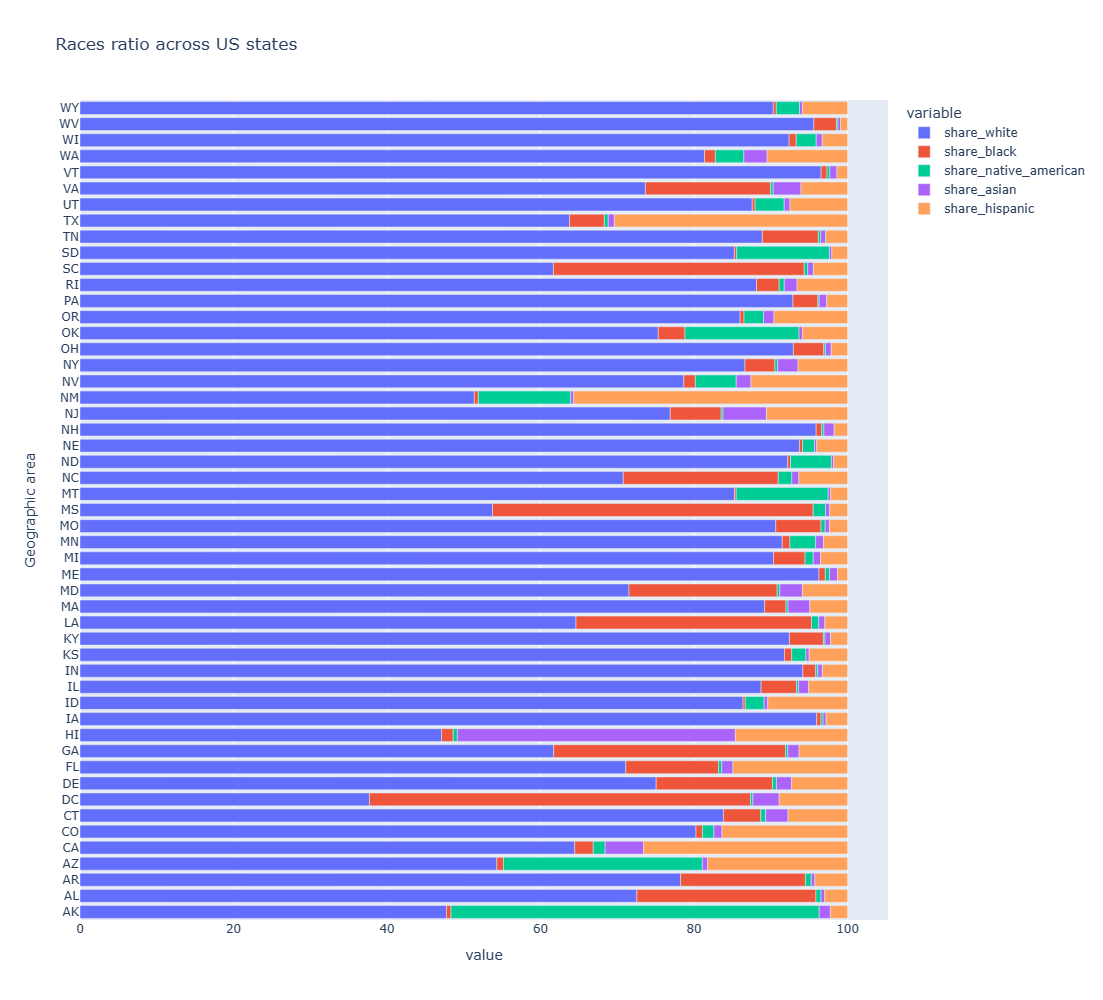

In [23]:
fig = px.bar(normalized_states_race_share, 
             x=["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"],
             orientation='h',
             height = 1000,
             title="Races ratio across US states"
            )


fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [24]:
fatalities_by_race = df_fatalities['race'].replace(
    {
        'W':'White',
        'B':'Black',
        'H':'Hispanic',
        'A':'Asian',
        'N':'Native American',
        'O':'Other'
    }
)

fatalities_by_race = fatalities_by_race.value_counts()

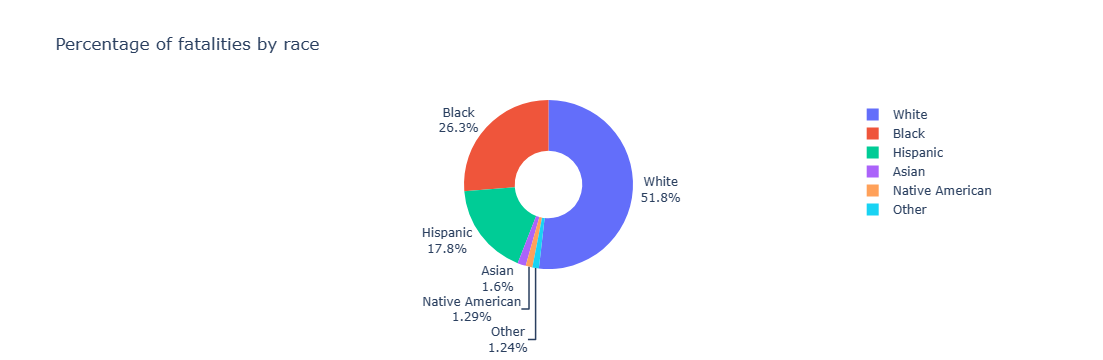

In [25]:
fig = px.pie(labels=fatalities_by_race.index,
             values=fatalities_by_race.values,
             title="Percentage of fatalities by race",
             names=fatalities_by_race.index,
             hole=0.4
)
fig.update_traces(textposition='outside', textinfo='percent+label')
 
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [26]:
fatalities_by_gender = df_fatalities['gender'].replace(
    {
        'F':'Female',
        'M':'Male'
    }
)

fatalities_by_gender = fatalities_by_gender.value_counts()

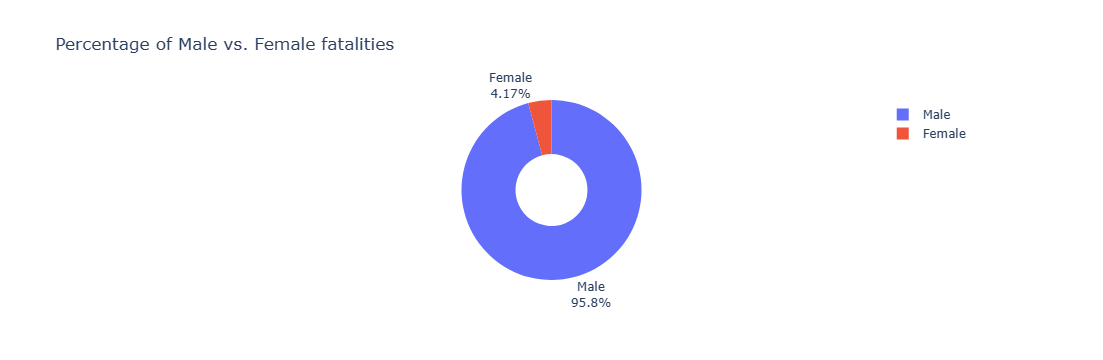

In [27]:
fig = px.pie(labels=fatalities_by_gender.index,
             values=fatalities_by_gender.values,
             title="Percentage of Male vs. Female fatalities",
             names=fatalities_by_gender.index,
             hole=0.4
)
fig.update_traces(textposition='outside', textinfo='percent+label')
 
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [28]:
df_fatalities.sample(5)

id                        name      date manner_of_death    armed  \
2146  2392       Epthen Lamont Johnson  01/03/17            shot    knife   
705    835         Rory Lynn Gunderman  16/09/15            shot      gun   
54     102  Jose Antonio Espinoza Ruiz  23/01/15            shot    knife   
8       16               Autumn Steele  06/01/15            shot  unarmed   
348    455        Lionel Lorenzo Young  10/05/15            shot  vehicle   

       age gender race        city state  signs_of_mental_illness  \
2146 40.00      M    B      Lufkin    TX                    False   
705  31.00      M    W        Lead    SD                     True   
54   56.00      M    H   Levelland    TX                    False   
8    34.00      F    W  Burlington    IA                    False   
348  34.00      M    B    Landover    MD                    False   

     threat_level         flee  body_camera  
2146       attack  Not fleeing         True  
705        attack         Foot        False  
54          other  Not fleeing        False  
8           other  Not fleeing         True  
348         other          Car        False

In [29]:
fatalities_by_manner = df_fatalities[['manner_of_death', 'age', 'gender']]

fatalities_by_manner['gender'].replace(
    {
        'F':'Female',
        'M':'Male'
    },
    inplace=True    
)
fatalities_by_manner

C:\Users\james\AppData\Local\Temp\ipykernel_2636\591625663.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



manner_of_death   age gender
0                 shot 53.00   Male
1                 shot 47.00   Male
2     shot and Tasered 23.00   Male
3                 shot 32.00   Male
4                 shot 39.00   Male
...                ...   ...    ...
2519              shot 16.00   Male
2523              shot 25.00   Male
2525              shot 39.00   Male
2533              shot 28.00   Male
2534              shot 32.00   Male

[2254 rows x 3 columns]

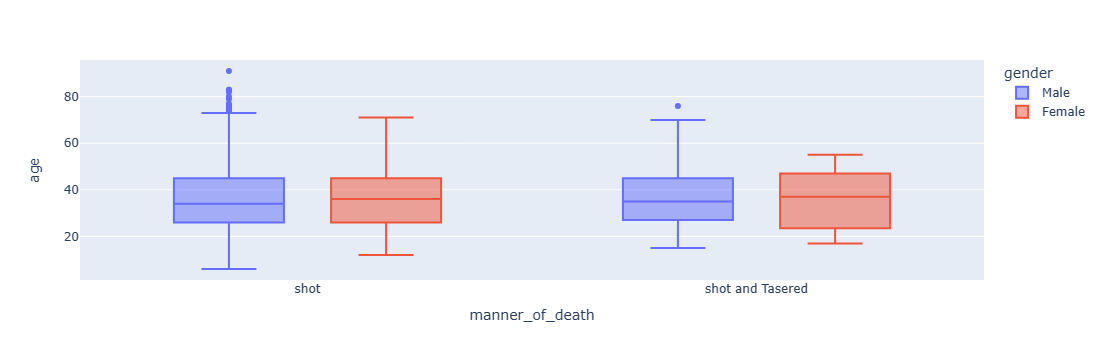

In [30]:
fig = px.box(fatalities_by_manner, x="manner_of_death", y="age", color="gender")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [31]:
df_fatalities['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'metal pole',
       'Taser', 'metal pipe', 'metal hand tool', 'blunt object',
       'metal stick', 'sharp object', 'meat cleaver', 'carjack', 'chain',
       "contractor's level", 'unknown weapon', 'stapler', 'crossbow',
       'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'scissors', 'pole', 'pick-axe', 'flashlight', 'spear', 'pitchfork',
       'hatchet and gun', 'rock', 'piece of wood', 'bayonet',
       'glass shard', 'motorcycle', 'metal rake', 'baton', 'crowbar',
       'oar', 'machete and gun', 'air conditioner', 'pole and knife',
       'beer bottle', 'pipe', 'baseba

In [32]:
fatalities_vs_armed = df_fatalities[['armed']]
fatalities_vs_armed['armed'] = fatalities_vs_armed['armed'].replace(['unarmed', 'undetermined'], ['Unarmed', 'Undetermined'])
fatalities_vs_armed['armed'] = fatalities_vs_armed['armed'].replace([val for val in fatalities_vs_armed['armed'].unique() if val not in ['Unarmed', 'Undetermined']], 'Armed')

fatalities_vs_armed = fatalities_vs_armed['armed'].value_counts()
fatalities_vs_armed

C:\Users\james\AppData\Local\Temp\ipykernel_2636\3774539380.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\james\AppData\Local\Temp\ipykernel_2636\3774539380.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



armed
Armed           1997
Unarmed          165
Undetermined      92
Name: count, dtype: int64

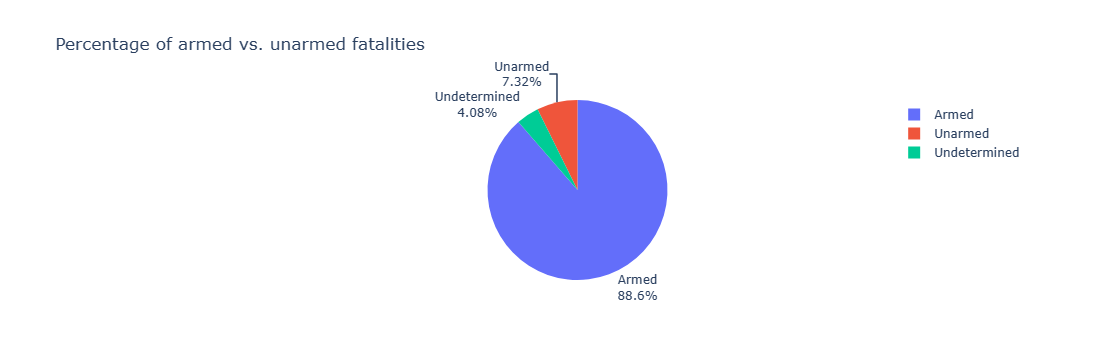

In [33]:
fig = px.pie(labels=fatalities_vs_armed.index,
             values=fatalities_vs_armed.values,
             title="Percentage of armed vs. unarmed fatalities",
             names=fatalities_vs_armed.index
)
fig.update_traces(textposition='outside', textinfo='percent+label')
 
fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [150]:
under_25 = len(df_fatalities[df_fatalities['age']<25])/len(df_fatalities)*100
print(f'{under_25:.2f}% of police victims were under the age of 25')

18.72% of police victims were under the age of 25


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

C:\Users\james\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



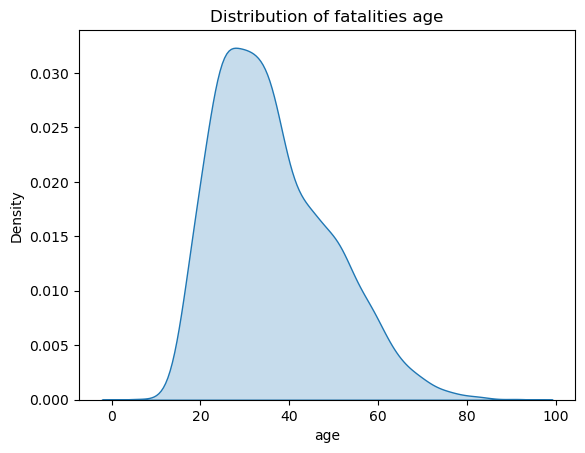

In [151]:
plt.title("Distribution of fatalities age")
sns.kdeplot(data=df_fatalities, x='age', fill=True)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

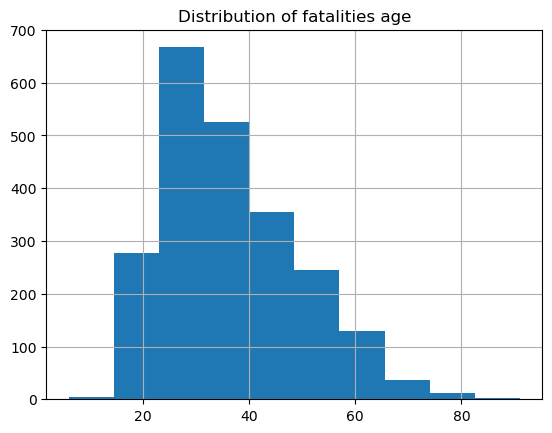

In [152]:
plt.title("Distribution of fatalities age")
df_fatalities['age'].hist()
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

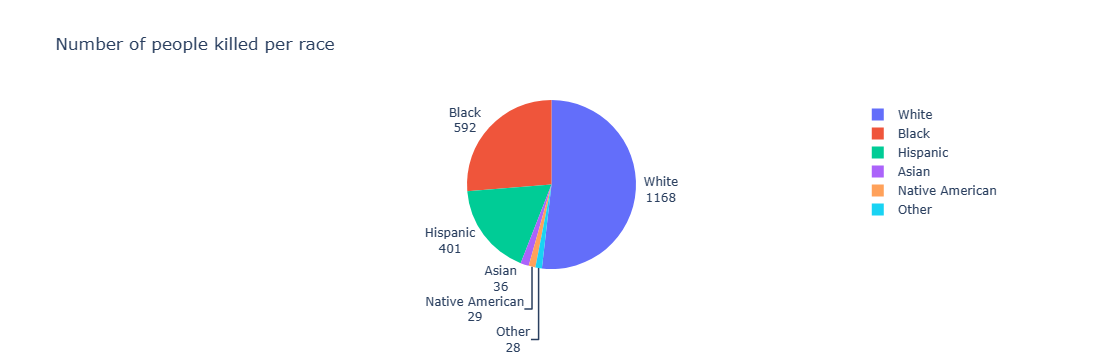

In [184]:
fig = px.pie(labels=fatalities_by_race.index,
             values=fatalities_by_race.values,
             title="Number of people killed per race",
             names=fatalities_by_race.index
)
fig.update_traces(textposition='outside', textinfo='value+label')
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [179]:
fatalities_vs_mental_health = df_fatalities['signs_of_mental_illness'].value_counts()

signs_of_mental_illness
False    1681
True      573
Name: count, dtype: int64

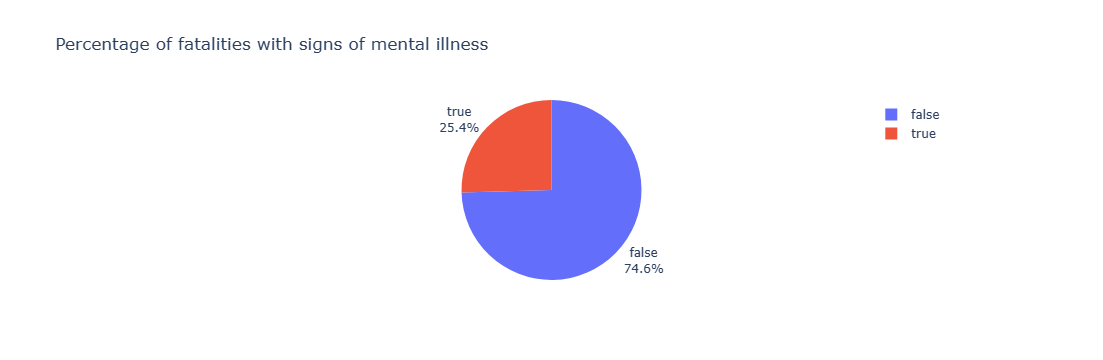

In [180]:
fig = px.pie(labels=fatalities_vs_mental_health.index,
             values=fatalities_vs_mental_health.values,
             title="Percentage of fatalities with signs of mental illness",
             names=fatalities_vs_mental_health.index
)
fig.update_traces(textposition='outside', textinfo='percent+label')
 
fig.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [149]:
fatalities_by_cities = df_fatalities.groupby(['city', 'state']).agg({'race': pd.Series.count})
top10_cities = fatalities_by_cities.nlargest(10, columns='race',  keep='all')
top10_cities.rename(columns={"race": "fatalities"}, inplace=True)

print('Top 10 most dangerous cities (by total number of fatalities):')
print(top10_cities)

Top 10 most dangerous cities (by total number of fatalities):
                    fatalities
city         state            
Los Angeles  CA             35
Phoenix      AZ             28
Houston      TX             23
Chicago      IL             22
Las Vegas    NV             17
Austin       TX             16
San Antonio  TX             15
Columbus     OH             14
Indianapolis IN             14
Miami        FL             14
St. Louis    MO             14


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [129]:
top_10_cities_fatalities = df_fatalities.loc[df_fatalities.apply(lambda x: (x['city'], x['state']) in top10_cities.index.to_list(), axis=1)]
top_10_cities_fatalities['city'] = top_10_cities_fatalities['city'] + ', ' + top_10_cities_fatalities['state']
top_10_cities_fatalities = top_10_cities_fatalities[['city', 'race']]
top_10_cities_fatalities

# Create a list of race values to calculate percentages for
race_values = ['W', 'B', 'H', 'A', 'N', 'O']

# Calculate percentage ratios for each race value and city
share_ratios = {}
for race in race_values:
    share_ratios[f'{race}'] = top_10_cities_fatalities.groupby('city')['race'].apply(lambda x: (x == race).mean() * 100)

# Create a new DataFrame with city and percentage ratios
top_10_cities_fatalities_race_ratio = pd.DataFrame({**share_ratios})


df_share_race_city['City'] = df_share_race_city['City'].str.replace(' city', '')
top_10_cities_race_ratio = df_share_race_city.loc[df_share_race_city.apply(lambda x: (x['City'], x['Geographic area']) in top10_cities.index.to_list(), axis=1)]
top_10_cities_race_ratio['city'] = top_10_cities_race_ratio['City'] + ', ' + top_10_cities_race_ratio['Geographic area']

sum_per_city = top_10_cities_race_ratio['share_asian'] + top_10_cities_race_ratio['share_black'] + top_10_cities_race_ratio['share_hispanic'] + top_10_cities_race_ratio['share_native_american'] + top_10_cities_race_ratio['share_white']  
norm_top_10_cities_race_ratio = {}
norm_top_10_cities_race_ratio['city'] = top_10_cities_race_ratio['city']
norm_top_10_cities_race_ratio['W'] = top_10_cities_race_ratio['share_white'] / sum_per_city * 100
norm_top_10_cities_race_ratio['B'] = top_10_cities_race_ratio['share_black'] / sum_per_city * 100
norm_top_10_cities_race_ratio['H'] = top_10_cities_race_ratio['share_hispanic'] / sum_per_city * 100
norm_top_10_cities_race_ratio['A'] = top_10_cities_race_ratio['share_asian'] / sum_per_city * 100
norm_top_10_cities_race_ratio['N'] = top_10_cities_race_ratio['share_native_american'] / sum_per_city * 100
norm_top_10_cities_race_ratio['O'] = 0.00


norm_top_10_cities_race_ratio = pd.DataFrame({**norm_top_10_cities_race_ratio})
norm_top_10_cities_race_ratio.set_index('city', inplace=True)


rename_dict = {
    'W': 'White',
    'B': 'Black', 
    'H': 'Hispanic',
    'A': 'Asian',
    'N': 'Native American',
    'O': 'Other'
}


top_10_cities_fatalities_race_ratio.rename(columns=rename_dict, inplace=True)
norm_top_10_cities_race_ratio.rename(columns=rename_dict, inplace=True)

print(top_10_cities_fatalities_race_ratio)
print(norm_top_10_cities_race_ratio)


                  White  Black  Hispanic  Asian  Native American  Other
city                                                                   
Austin, TX        68.75  18.75     12.50   0.00             0.00   0.00
Chicago, IL        9.09  86.36      4.55   0.00             0.00   0.00
Columbus, OH      35.71  57.14      0.00   0.00             0.00   7.14
Houston, TX       13.04  60.87     21.74   4.35             0.00   0.00
Indianapolis, IN  35.71  64.29      0.00   0.00             0.00   0.00
Las Vegas, NV     52.94  17.65     29.41   0.00             0.00   0.00
Los Angeles, CA   17.14  28.57     51.43   2.86             0.00   0.00
Miami, FL          7.14  50.00     42.86   0.00             0.00   0.00
Phoenix, AZ       42.86   7.14     39.29   0.00            10.71   0.00
San Antonio, TX   13.33  13.33     73.33   0.00             0.00   0.00
St. Louis, MO     21.43  78.57      0.00   0.00             0.00   0.00
                  White  Black  Hispanic  Asian  Native American

C:\Users\james\AppData\Local\Temp\ipykernel_2636\2863418169.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\james\AppData\Local\Temp\ipykernel_2636\2863418169.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\james\AppData\Local\Temp\ipykernel_2636\27820964.py:14: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



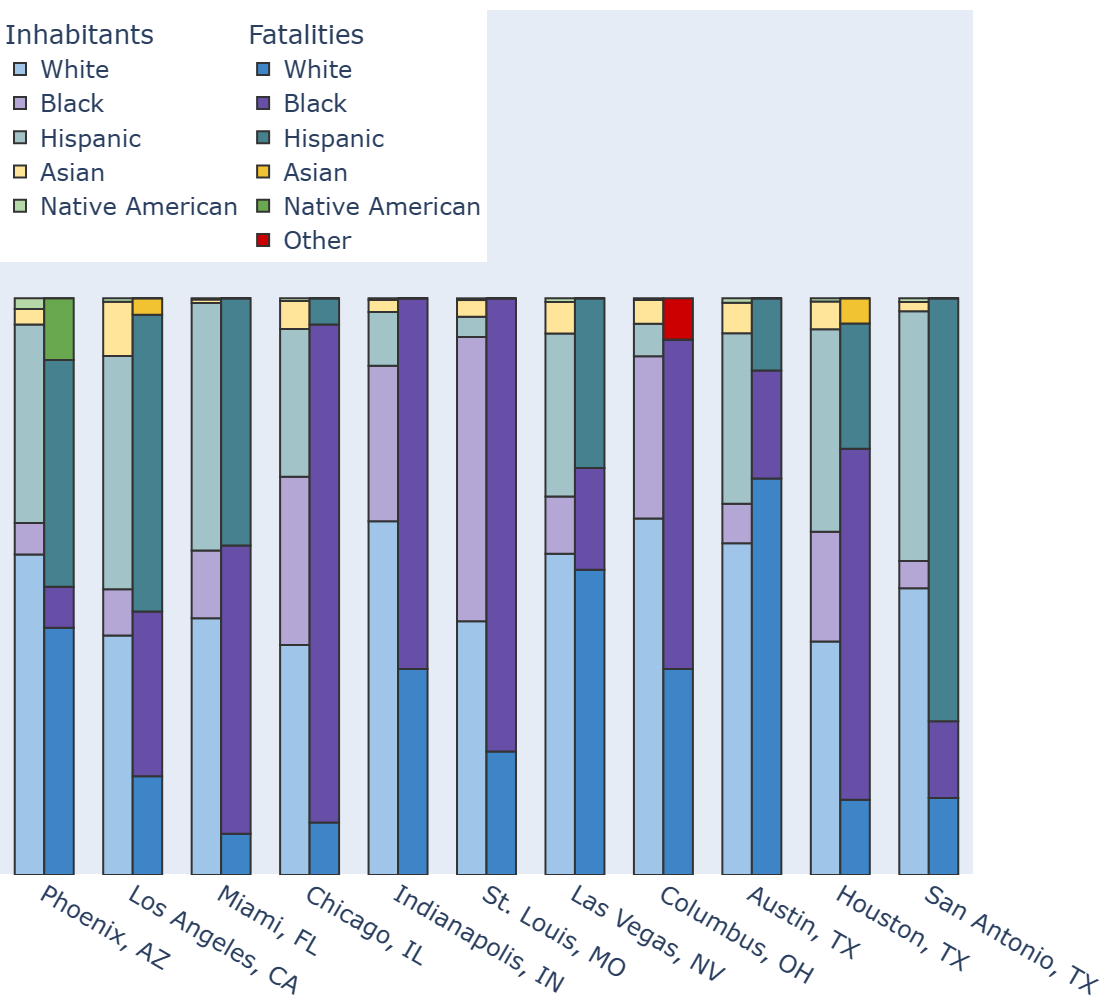

In [148]:
df = pd.concat(
    [norm_top_10_cities_race_ratio, top_10_cities_fatalities_race_ratio],
    axis=1,
    keys=["Inhabitants", "Fatalities"]
)

fig = go.Figure(
    layout=go.Layout(
        height=1000,
        width=1200,
        barmode="relative",
        yaxis_showticklabels=False,
        yaxis_showgrid=False,
        yaxis_range=[0, df.groupby(axis=1, level=0).sum().max().max() * 1.5],
       # Secondary y-axis overlayed on the primary one and not visible
        yaxis2=go.layout.YAxis(
            visible=False,
            matches="y",
            overlaying="y",
            anchor="x",
        ),
        font=dict(size=24),
        legend_x=0,
        legend_y=1,
        legend_orientation="h",
        hovermode="x",
        margin=dict(b=0,t=10,l=0,r=10)
    )
)

colors = {
    "Inhabitants": {
        "White": "#9fc5e8",
        "Black": "#b4a7d6",
        "Hispanic": "#a2c4c9",
        "Asian": "#ffe599",
        "Native American": "#b6d7a8",
        "Other": "#ea9999"
    },
    "Fatalities": {
        "White": "#3d85c6",
        "Black": "#674ea7",
        "Hispanic": "#45818e",
        "Asian": "#f1c232",
        "Native American": "#6aa84f",
        "Other": "#cc0000"
    }
}

for i, t in enumerate(colors):
    for j, col in enumerate(df[t].columns):
        if (df[t][col] == 0).all():
            continue
        fig.add_bar(
            x=df.index,
            y=df[t][col],
            # Set the right yaxis depending on the selected product (from enumerate)
            yaxis=f"y{i + 1}",
            # Offset the bar trace, offset needs to match the width
            # For categorical traces, each category is spaced by 1
            offsetgroup=str(i),
            offset=(i - 1) * 1/3,
            width=1/3,
            legendgroup=t,
            legendgrouptitle_text=t,
            name=col,
            marker_color=colors[t][col],
            marker_line=dict(width=2, color="#333"),
            hovertemplate="%{y}<extra></extra>"
        )

fig.show()


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [153]:
fatalities_by_state = df_fatalities['state'].value_counts().sort_index()

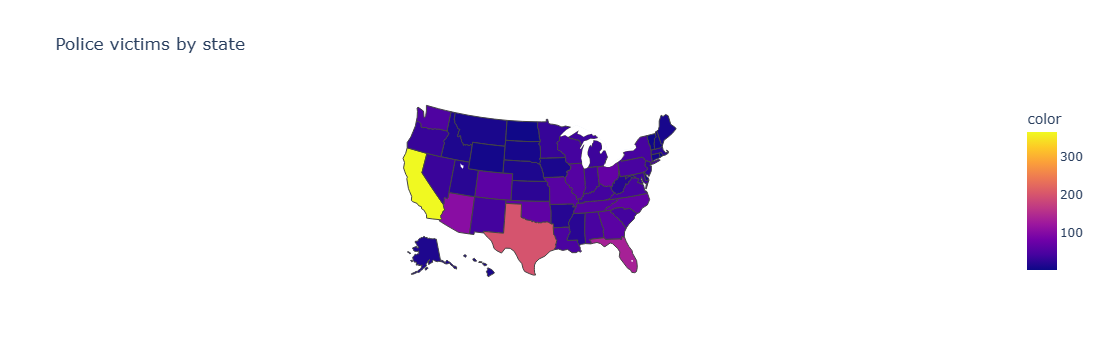

In [157]:
px.choropleth(
    data_frame = fatalities_by_state,
    locations = fatalities_by_state.index,
    color = fatalities_by_state.values,
    locationmode="USA-states",
    scope='usa',
    title = 'Police victims by state'
)

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [163]:
monthly_fatalities = df_fatalities.copy()
monthly_fatalities['date'] = pd.to_datetime(monthly_fatalities['date'], infer_datetime_format=True).dt.to_period('m')
monthly_fatalities['date'] = monthly_fatalities['date'].astype(str)
monthly_fatalities = monthly_fatalities.groupby('date').size()
monthly_fatalities

C:\Users\james\AppData\Local\Temp\ipykernel_2636\4075884333.py:2: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\james\AppData\Local\Temp\ipykernel_2636\4075884333.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



date
2015-01    68
2015-02    76
2015-03    86
2015-04    87
2015-05    84
2015-06    67
2015-07    81
2015-08    82
2015-09    84
2015-10    83
2015-11    76
2015-12    73
2016-01    80
2016-02    78
2016-03    81
2016-04    70
2016-05    76
2016-06    81
2016-07    70
2016-08    73
2016-09    65
2016-10    68
2016-11    74
2016-12    57
2017-01    70
2017-02    63
2017-03    62
2017-04    52
2017-05    44
2017-06    42
2017-07    34
2017-08    12
2017-09    14
2017-10    15
2017-11    11
2017-12    15
dtype: int64

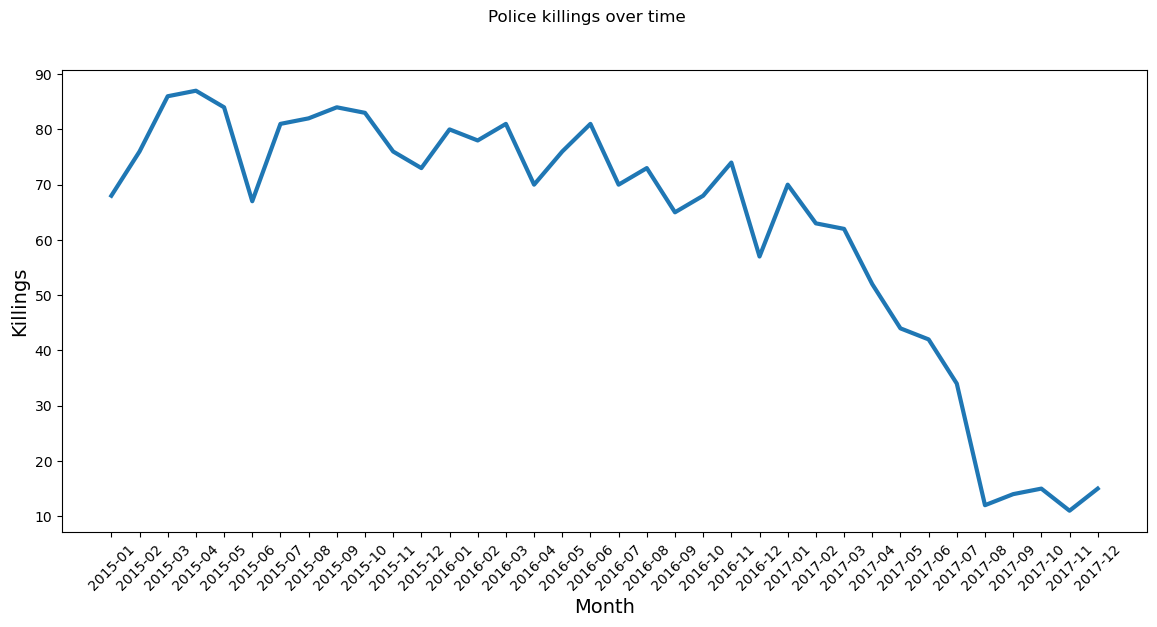

In [165]:
plt.figure(figsize=(14,6))
plt.plot(monthly_fatalities.index, monthly_fatalities, linewidth=3)
plt.xticks(ticks=monthly_fatalities.index, fontsize=10, rotation=45)
plt.suptitle('Police killings over time')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Killings', fontsize=14)

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).